# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats
import math

df = pd.read_csv('data/human_body_temperature.csv')

<hr>
## 1. Is the distribution of body temperatures normal?
Looking at the first histogram below, we see that **the distribution of body temperatures is normal since the curve is bell-shaped**. This also holds true for the distributions for males and females individually.

Checking **normaltest() also shows that the distributions are normal**, with p-values all greather than 0.05.


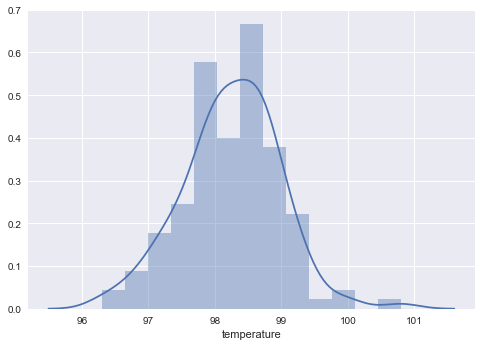

In [190]:
# USE DISTRIBUTION PLOT TO CHECK IF NORMAL
sns.set()
sns.distplot(df.temperature)
plt.xlabel('temperature')
plt.show()

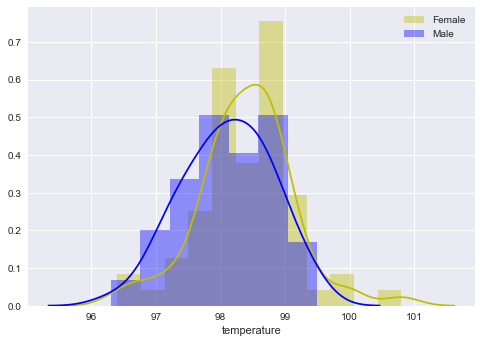

In [191]:
# USE DISTRIBUTION PLOTS TO CHECK IF NORMAL 
df_f = df[df.gender == 'F']
df_m = df[df.gender == 'M']

sns.set()
sns.distplot(df_f.temperature, color='y', label='Female')
sns.distplot(df_m.temperature, color='b', label='Male')
plt.xlabel('temperature')
plt.legend()

plt.show()

In [192]:
# USE NORMALTEST() TO CHECK IF NORMAL
_ = stats.normaltest(df.temperature.sort_values())
f_ = stats.normaltest(df_f.temperature.sort_values())
m_ = stats.normaltest(df_m.temperature.sort_values())
print(_)
print(f_)
print(m_)

NormaltestResult(statistic=2.7038014333192359, pvalue=0.25874798634882118)
NormaltestResult(statistic=4.7354381129083958, pvalue=0.093694193898564204)
NormaltestResult(statistic=0.89119996669531965, pvalue=0.640439907456826)


<hr>

## 2. Is the sample size large? Are the observations independent?
Looking at the shape of the dataframe we see that it contains 130 rows and 3 columns. **Since n > 30, this sample size is considered large, therefore, the CLT can be applied**. **Each observation is independent** since the body temperature and heart rate of one person do not affect the outcomes of another person.


In [193]:
df.shape

(130, 3)

In [194]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<hr>
## 3. Is the true population mean really 98.6 degrees F?

In this case, a **one-sample test** is appropriate because we are treating males and females as being in one group.  **Z-statistic is appropriate since n > 30**.

<u>Hypothesis Test</u>:<br>
$H$o : The true population mean temperature =  sample mean of 98.6 <br>
$H$a : The true population mean temperature ≠  sample mean of 98.6

<u>Using Z-statistic (two-tailed):</u><br>
- Significance level (α) = 0.05
- Confidence level = 95%
- The critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations.

<u>Decision Rule:</u><br>
- If z statistic < -1.96 and > 1.96, we reject $H$o. **Since z statistic = -5.45, we can reject $H$o**.
- If p value < 0.05, it is statistically significant and we can reject $H$o. **From the t test below, we have a small p value of 2.4106320415561276e-07 < 0.05, we can reject $H$o **. 

<u>Using T-statistic (two-tailed):</u><br>
- The t statistic is calculated using the same formula as the z statistic.
- Cumulative probablity 97.5%
- Degrees of freedom (n-1) = 129
- T-value = 1.979 (http://stattrek.com/online-calculator/t-distribution.aspx)

<u>Decision Rule:</u><br>
- If t statistic < -1.979 and > 1.979, we reject $H$o. **From the t test below, we have a t statistic -5.45 < -1.979, we can reject $H$o **. 
Would you use a one-sample or two-sample test? Why?


<u>Conclusion:</u><br>
- **With a p-value significantly less than 0.05, we can conclude that the true population mean is not really 98.6 degrees F. $H$o is rejected.**
- **Both the z statistic and t statistic confirms this decision, with a z statistic of -5.45 well below the critical values of -1.96**. 
- **The z statistic and t statistic yield the same result because n = 130 is a sufficiently large size.**


In [195]:
# CALCULATE Z STATISTIC 
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

z = (x - mu)/(std / math.sqrt(n))
print('Z statistic:', z)

# CALCULATE P VALUE
p = stats.t.sf(np.abs(z), n-1)*2 
print('P value:', p)

Z statistic: -5.454823292364079
P value: 2.41063204156e-07


In [196]:
# CALCULATE T STATISTIC USING SCIPY
stats.ttest_1samp(df.temperature,mu)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [197]:
# CALCULATE T STATISTIC
x = df.temperature.mean()
mu = 98.6
std = df.temperature.std()
n = len(df)

t = (x - mu)/(std / math.sqrt(n))
print('T statistic:', t)

# CALCULATE P VALUE
p = stats.t.sf(np.abs(t), n-1)*2 
print('P value:', p)

T statistic: -5.454823292364079
P value: 2.41063204156e-07


<hr>
## 4. At what temperature should we consider someone's temperature to be "abnormal"?
From our work above, we know that a z score value above or below 1.96 would be "abnormal". From the calculations below, we see that a **body temperature below 98.12 degrees or above 98.38 degrees would be seen as  abnormal**.


In [198]:
# CALCULATE MARGIN OF ERROR
std = df.temperature.std()
n = len(df.temperature)
moe = 1.96 * std / np.sqrt(n)
print('moe:',moe)

# CALCULATE CONFIDENCE INTERVAL
mean = df['temperature'].mean()
ci = mean + np.array([-1, 1]) * moe
print('ci:', ci)

moe: 0.126036657002
ci: [ 98.12319411  98.37526743]


In [199]:
# CALCULATE CONFIDENCE INTERVUAL USING SCIPY 
norm.interval(0.95, x, stats.sem(df.temperature))

(98.123196428181657, 98.375265110279898)

<hr>
## 5. Is there a significant difference between males and females in normal temperature?
- It's appropriate to **use a two-sample t-statistic** since we are now comparing between two samples of males and females.

<u>Hypothesis Test</u>:<br>
$H$o : Sample mean of Male Temperature = Sample mean of Female Temperature <br>
$H$a : Sample mean of Male Temperature ≠  Sample mean of Female Temperature

<u>Using T-statistic (two-tailed):</u><br>
<p><img src="https://2.bp.blogspot.com/-N4RH8FGBgIw/V40HWQls8mI/AAAAAAAAE4E/w2dXmRweNNQrt3CvZH7DCg0emHUQQH3uwCEw/s1600/tstat2.gif" width=160 align="left"/>
</p>
<br><br><br><br>
- Significance level (α) = 0.05
- Degrees of freedom (n1+ n2 - 2) = 128
- T-value = 1.979 (http://stattrek.com/online-calculator/t-distribution.aspx)

<u>Decision Rule:</u><br>
- If t statistic < -1.979 and > 1.979, we reject $H$o. **From the t test below, we have a t statistic 2.285 > 1.979, we can reject $H$o **. 
- If p value < 0.05, it is statistically significant and we can reject $H$o. **From the t test below, we have a p value of  0.023 < 0.05, we can reject $H$o **. 



<u>Conclusion:</u><br>

- The p-value of the z statistic is 0.024, **$H$o can just be rejected at a level of significance of .024 < 0.05**. 
- **The 0.289 degree difference between the female mean temperature and male mean temperature is significant at 2.4%**.

In [200]:
# SAMPLE SIZES
n1 = len(df_f)
n2 = len(df_m)
print('n1:', n1)
print('n2:', n2)

n1: 65
n2: 65


In [201]:
# MEAN OF BOTH SAMPLES, DIFFERENCE OF MEANS
m1 = df_f.temperature.mean()
print('Female Mean Temp:', m1)
m2 = df_m.temperature.mean()
print('Male Mean Temp:', m2)
print('Diff of Means:', m1-m2)

Female Mean Temp: 98.39384615384613
Male Mean Temp: 98.1046153846154
Diff of Means: 0.289230769230727


In [202]:
# STANDARD DEVIATION OF BOTH SAMPLES
std1 = df_f.temperature.std()
print('Female Std Temp:', std1)
std2 = df_m.temperature.std()
print('Male Std Temp:', std2)

Female Std Temp: 0.7434877527313665
Male Std Temp: 0.6987557623265908


In [203]:
# VARIANCE
v = std1**2 / n1 + std2**2 / n2
print('Variance:', v)

# DEGREES OF FREEDOM
df = n1 + n2 - 2
print('DF:', df)

Variance: 0.016015902366863885
DF: 128


In [204]:
# CALCULATE T STATISTIC
t = (m1 - m2) / math.sqrt(v)
print('T statistic:', t)

# CALCULATE P VALUE
p = stats.t.sf(np.abs(t), df)*2 
print('P value:', p)

T statistic: 2.285434538165274
P value: 0.0239318831224
